# Abstract

In this notebook I use a QLattice symbolic regressor to find mathematical model that can predict churn. I find that a quite simple model yields good results (AUC=0.83, accuracy=85%).

# The QLattice

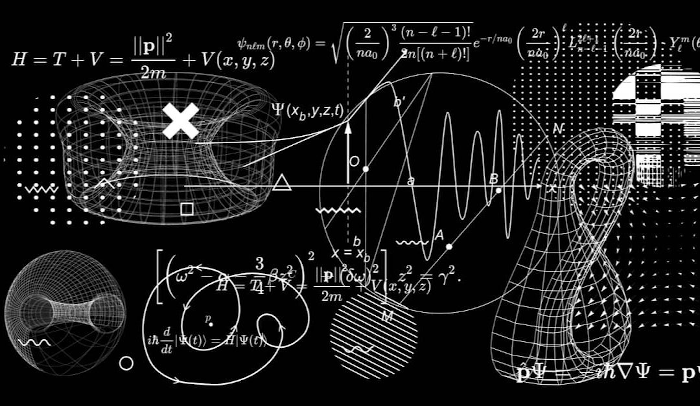

The QLattice is a supervised machine learning tool for symbolic regression developed by Abzu. QLattices have been shown in research to perform very well and yield simple and explainable models: Symbolic regression outperforms other models for small data sets

Abzu provides free QLattices for non-commercial use. Read more about how it works here: https://docs.abzu.ai/docs/guides/getting_started/community.html

The feyn Python module is not installed on Kaggle by default so we have to pip install it first.

In [ ]:
!pip install feyn

In [ ]:
import pandas as pd
import feyn

In [ ]:
df = pd.read_csv("/kaggle/input/churn-modelling/Churn_Modelling.csv")
df

In [ ]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [ ]:
train,test = feyn.tools.split(df, ratio=(4,1), random_state=42)

# Categorical data

The QLattice will work fine with both categorical and numerical data. I just need to tell it which is which. Read more about categorical data in the QLattice here: https://docs.abzu.ai/docs/guides/essentials/stypes.html

In [ ]:
stypes = {}
for colname in df:
    if df[colname].dtype == object:
        stypes[colname] = "cat"

stypes


# Allocate a QLattice

The actual QLattice is a quantum simulator that runs on Abzu's hardware, but we can allocate one to use for our analysis with a single line of code. Hopefully the following line will get us one.


In [ ]:
ql = feyn.connect_qlattice()
ql.reset(random_seed=42)

In [ ]:
models = ql.auto_run(train, output_name="Exited", kind="classifier", stypes=stypes, criterion="bic", n_epochs=50)

# Evaluate
Evaluate the AUC of the model on both the train and the test set

In [ ]:
models[0].plot_roc_curve(train)
models[0].plot_roc_curve(test)

# Feature importance
Plot how correlation arises throughout the model

In [ ]:
models[0].plot(test)

# Partial plot
As an example of a partial plot, let's look at the probaility of churning as a function of age. It's fun to see the gaussian peak in the late 50's

In [ ]:
models[0].plot_partial(test, by="Age")